<a href="https://colab.research.google.com/github/HanSupace/oss/blob/main/%EB%8F%84%EC%84%9C%EB%B3%84_%EC%9E%90%EB%A3%8C_%EC%A0%95%EB%A6%AC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [18]:
import pandas as pd

ns_book7 = pd.read_csv('ns_book7.csv', low_memory=False)
ns_book7.head()


,번호,도서명,저자,출판사,발행년도,ISBN,세트 ISBN,부가기호,권,주제분류번호,도서권수,대출건수,등록일자
0,1,인공지능과 흙,김동훈 지음,민음사,2021,9788937444319,NaN,NaN,NaN,NaN,1,0,2021-03-19
1,2,가짜 행복 권하는 사회,김태형 지음,갈매나무,2021,9791190123969,NaN,NaN,NaN,NaN,1,0,2021-03-19
2,3,나도 한 문장 잘 쓰면 바랄 게 없겠네,김선영 지음,블랙피쉬,2021,9788968332982,NaN,NaN,NaN,NaN,1,0,2021-03-19
3,4,예루살렘 해변,"이도 게펜 지음, 임재희 옮김",문학세계사,2021,9788970759906,NaN,NaN,NaN,NaN,1,0,2021-03-19
4,5,김성곤의 중국한시기행 : 장강·황하 편,김성곤 지음,김영사,2021,9788934990833,NaN,NaN,NaN,NaN,1,0,2021-03-19


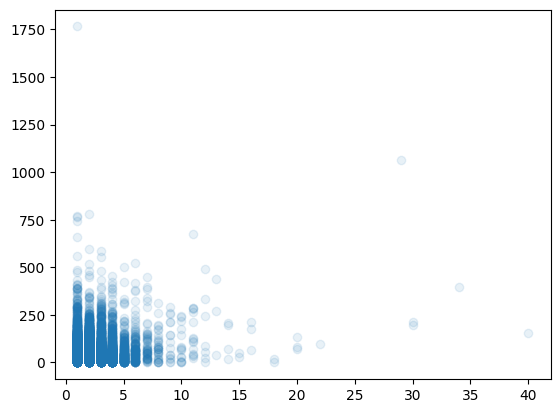

In [19]:
import matplotlib.pyplot as plt

plt.scatter(ns_book7['도서권수'], ns_book7['대출건수'], alpha=0.1)
plt.show()

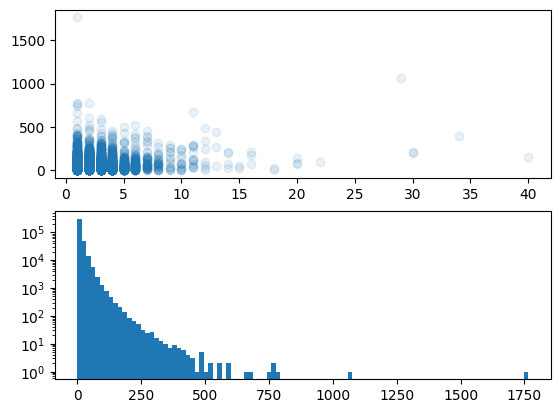

In [20]:
fig, axs = plt.subplots(2)

axs[0].scatter(ns_book7['도서권수'], ns_book7['대출건수'], alpha=0.1)

axs[1].hist(ns_book7['대출건수'], bins=100)
axs[1].set_yscale('log')

fig.show()

In [21]:
import numpy as np

def kdc_1st_char(no):
    if no is np.nan:
        return '-1'
    else:
        return no[0]

count_by_subject = ns_book7['주제분류번호'].apply(kdc_1st_char).value_counts()
count_by_subject

,count
주제분류번호,
8,108643
3,80767
5,40916
9,26375
6,25070
1,22647
-1,16978
7,15836
4,13688


## 주제별 도서개수 구하기

In [22]:
import matplotlib.pyplot as plt
plt.rcParams['figure.dpi'] = 100

In [23]:
count_by_year = ns_book7['발행년도'].value_counts()
count_by_year
count_by_year = count_by_year.sort_index()
count_by_year
count_by_year = count_by_year[count_by_year.index <= 2030]
count_by_year

,count
발행년도,
1947,1
1948,1
1949,1
1952,11
1954,1
...,...
2020,11834
2021,1255
2025,1


## 그래프 그리기


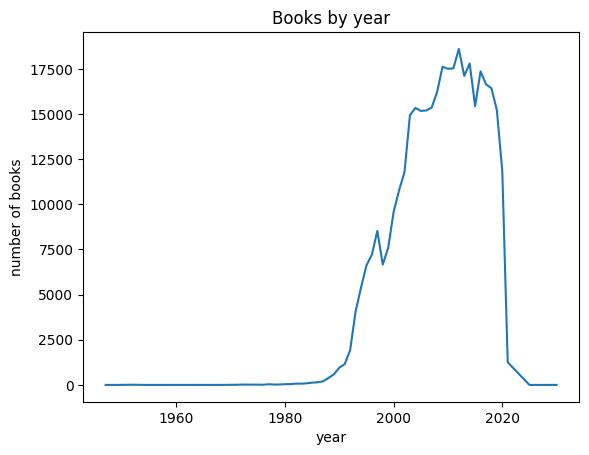

In [24]:
plt.plot(count_by_year.index, count_by_year.values)
plt.title('Books by year')
plt.xlabel('year')
plt.ylabel('number of books')
plt.show()

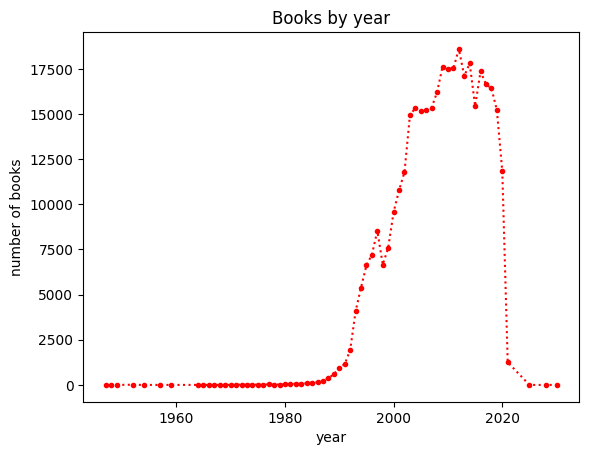

In [25]:
plt.plot(count_by_year, marker='.', linestyle=':', color='red')
plt.title('Books by year')
plt.xlabel('year')
plt.ylabel('number of books')
plt.show()

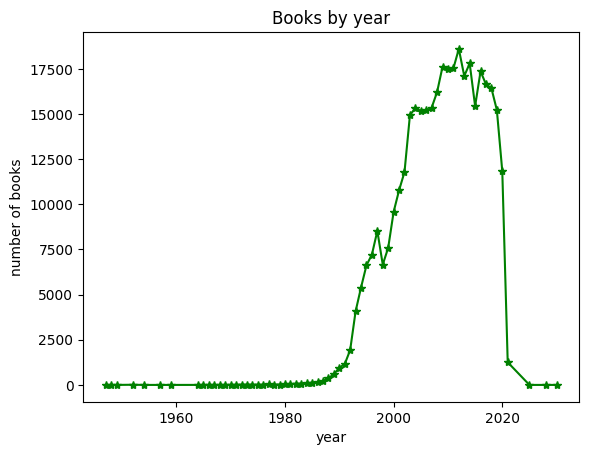

In [26]:
plt.plot(count_by_year, '*-g')
plt.title('Books by year')
plt.xlabel('year')
plt.ylabel('number of books')
plt.show()

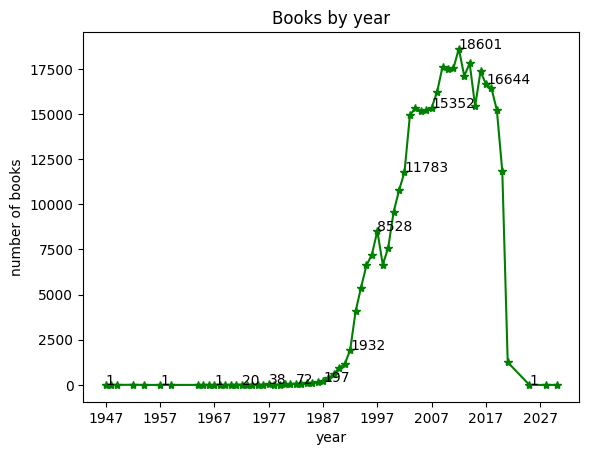

In [27]:
plt.plot(count_by_year, '*-g')
plt.title('Books by year')
plt.xlabel('year')
plt.ylabel('number of books')
plt.xticks(range(1947, 2030, 10))
for idx, val in count_by_year[::5].items():
    plt.annotate(val, (idx, val))
plt.show()

##막대그래프 그리기

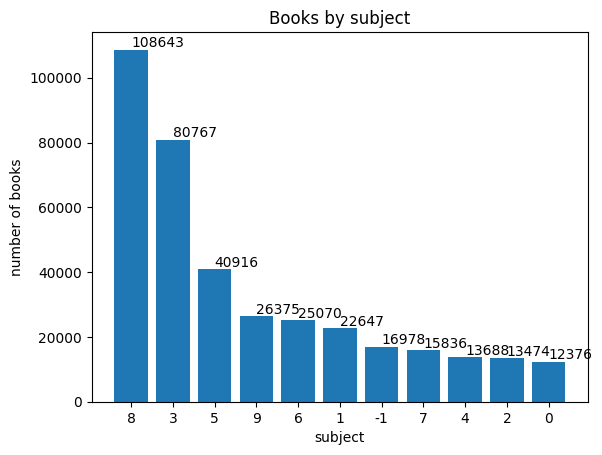

In [28]:
plt.bar(count_by_subject.index, count_by_subject.values)
plt.title('Books by subject')
plt.xlabel('subject')
plt.ylabel('number of books')
for idx, val in count_by_subject.items():
    plt.annotate(val, (idx, val), xytext=(0, 2), textcoords='offset points')
plt.show()

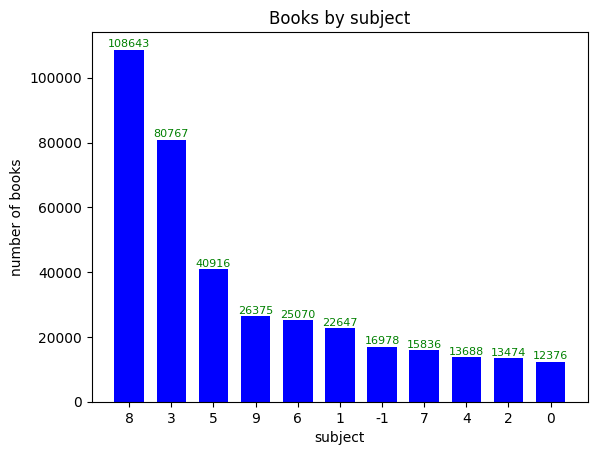

In [29]:
plt.bar(count_by_subject.index, count_by_subject.values, width=0.7, color='blue')
plt.title('Books by subject')
plt.xlabel('subject')
plt.ylabel('number of books')
for idx, val in count_by_subject.items():
    plt.annotate(val, (idx, val), xytext=(0, 2), textcoords='offset points',
                 fontsize=8, ha='center', color='green')
plt.show()

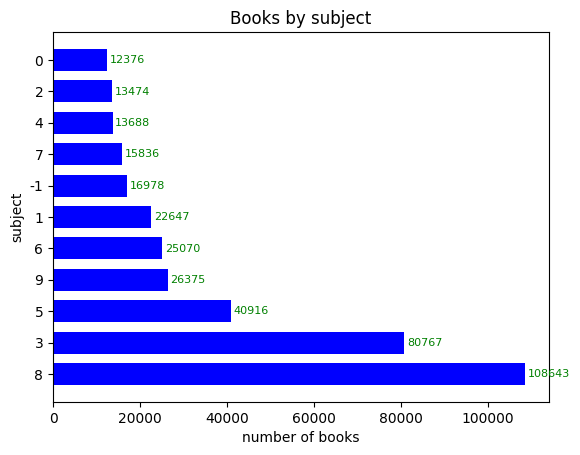

In [30]:
plt.barh(count_by_subject.index, count_by_subject.values, height=0.7, color='blue')
plt.title('Books by subject')
plt.xlabel('number of books')
plt.ylabel('subject')
for idx, val in count_by_subject.items():
    plt.annotate(val, (val, idx), xytext=(2, 0), textcoords='offset points',
                 fontsize=8, va='center', color='green')
plt.show()